![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

This material is based on the example provided at 
https://pybimstab.readthedocs.io/en/latest/index.html

**Further references:**

[1] Zhu, D. Y., Lee, C. F., Qian, Q. H., & Chen, G. R. (2005). A concise algorithm for computing the factor of safety using the Morgenstern-Price method. Canadian Geotechnical Journal, 42(1), 272–278. https://doi.org/10.1139/t04-072

[2] Fredlund, D. G., & Krahn, J. (1977). Comparison of slope stability methods of analysis. Canadian Geotechnical Journal, 14(3), 429–439. https://doi.org/10.1139/t77-045

[3] Goldscheider, M. (2018). Berechnung von Gleitkreisen mit dem Lamellenverfahren und die Berücksichtigung von Zuggliedern. Geotechnik, 41(2), 109–123. https://doi.org/10.1002/gete.201700021


Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics

# Slope failure analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#Some plot settings
import plot_functions.plot_settings

from pybimstab.slope import AnthropicSlope
from pybimstab.slipsurface import CircularSurface
from pybimstab.slices import MaterialParameters, Slices
from pybimstab.slopestabl import SlopeStabl
from pybimstab.watertable import WaterTable

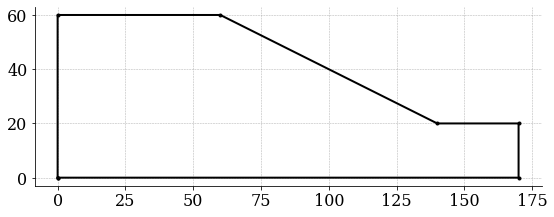

In [2]:
slope = AnthropicSlope(slopeHeight=40, slopeDip=[2, 1],
                       crownDist=60, toeDist=30, depth=20)
fig = slope.plot();

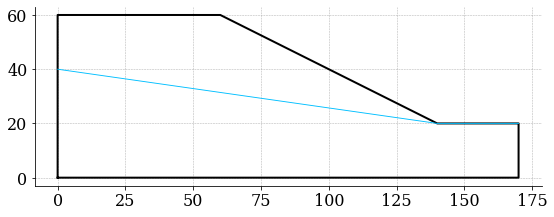

In [3]:
watertable = WaterTable(slopeCoords=slope.coords,
                        watertabDepths=np.array([[0, 140],[20, 0]]))
fig = watertable.plot();

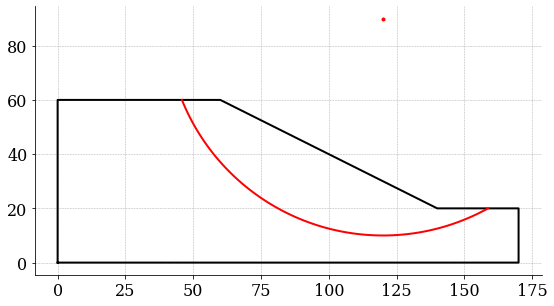

In [4]:
surface = CircularSurface(slopeCoords=slope.coords,
                          dist1=45.838, dist2=158.726,
                          radius=80)
fig = surface.plot();

In [5]:
material = MaterialParameters(cohesion=600, frictAngle=20,
                              unitWeight=120,
                              wtUnitWeight=62.4)

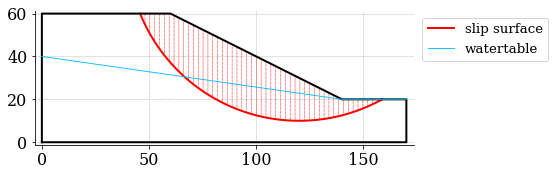

In [6]:
slices = Slices(
    material=material, slipSurfCoords=surface.coords,
    slopeCoords=slope.coords, numSlices=50,
    watertabCoords=watertable.coords, bim=None)
fig = slices.plot();

In [7]:
stabAnalysis = SlopeStabl(slices, seedFS=1, Kh=0,
                          interSlcFunc=1)

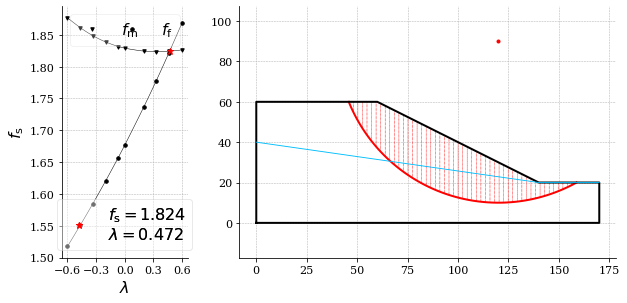

In [15]:
fig = stabAnalysis.plot();
#fig.savefig('Lamellen.pdf')

Das vereinfachte Bishop-Verfahren (Lamellenzwischenkraftneigungsbeiwert $\lambda = 0$) liefert ein Ergebnis, dass sich nur unwesentlich von dem des erweiterten Verfahrens unterscheidet.

In [9]:
print("Fs = %.3f nach Bishop." %stabAnalysis.fsBishop)

Fs = 1.829 nach Bishop.


In [10]:
print("Fs = %.3f nach Spencer." %stabAnalysis.FS['fs'])

Fs = 1.829 nach Spencer.


In [11]:
stabAnalysis = SlopeStabl(slices, seedFS=1, Kh=0,
                          interSlcFunc='halfsine')

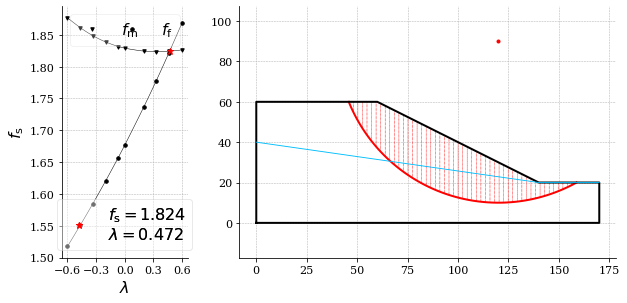

In [12]:
fig = stabAnalysis.plot();

In [13]:
print("Fs = %.3f nach Bishop." %stabAnalysis.fsBishop)

Fs = 1.829 nach Bishop.


In [14]:
print("Fs = %.3f nach Morgenstern & Price." %stabAnalysis.FS['fs'])

Fs = 1.824 nach Morgenstern & Price.
